## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [6]:
#Question 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

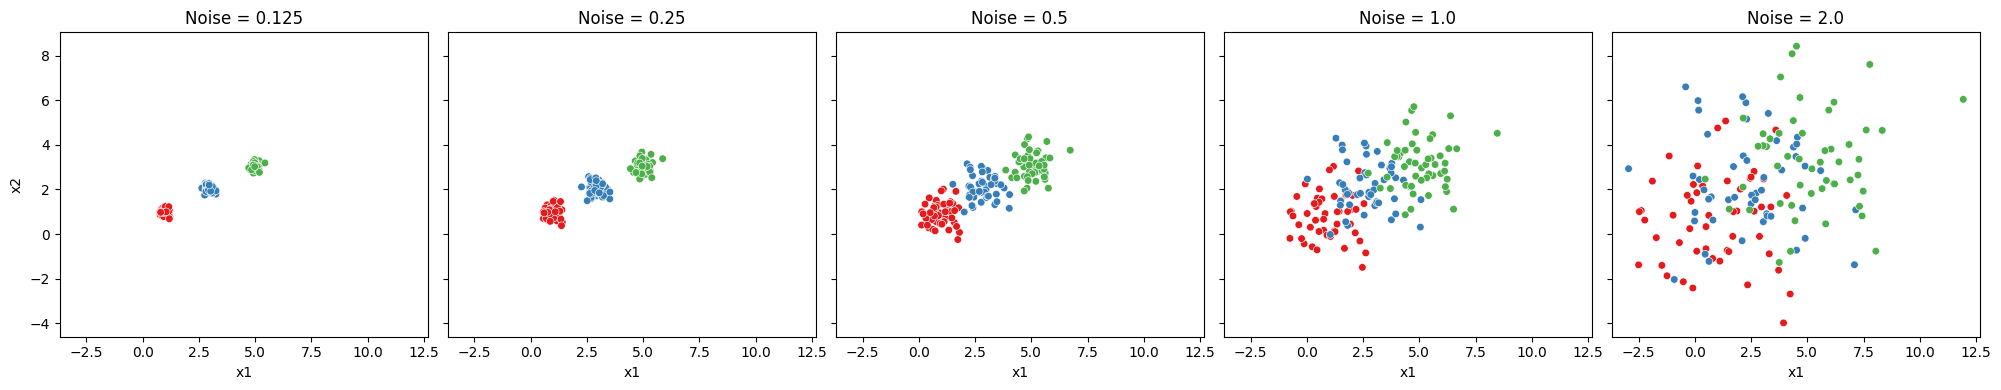

In [7]:
#Question 2
datasets = {
    "Noise = 0.125": df0_125,
    "Noise = 0.25": df0_25,
    "Noise = 0.5": df0_5,
    "Noise = 1.0": df1_0,
    "Noise = 2.0": df2_0
}

fig, axes = plt.subplots(1, 5, figsize=(20,4), sharex=True, sharey=True)

for ax, (title, df) in zip(axes, datasets.items()):
    sns.scatterplot(data=df, x="x1", y="x2", hue="group", ax=ax, palette="Set1", s=30)
    ax.set_title(title)
    ax.legend().remove()

plt.tight_layout()
plt.show()


#As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

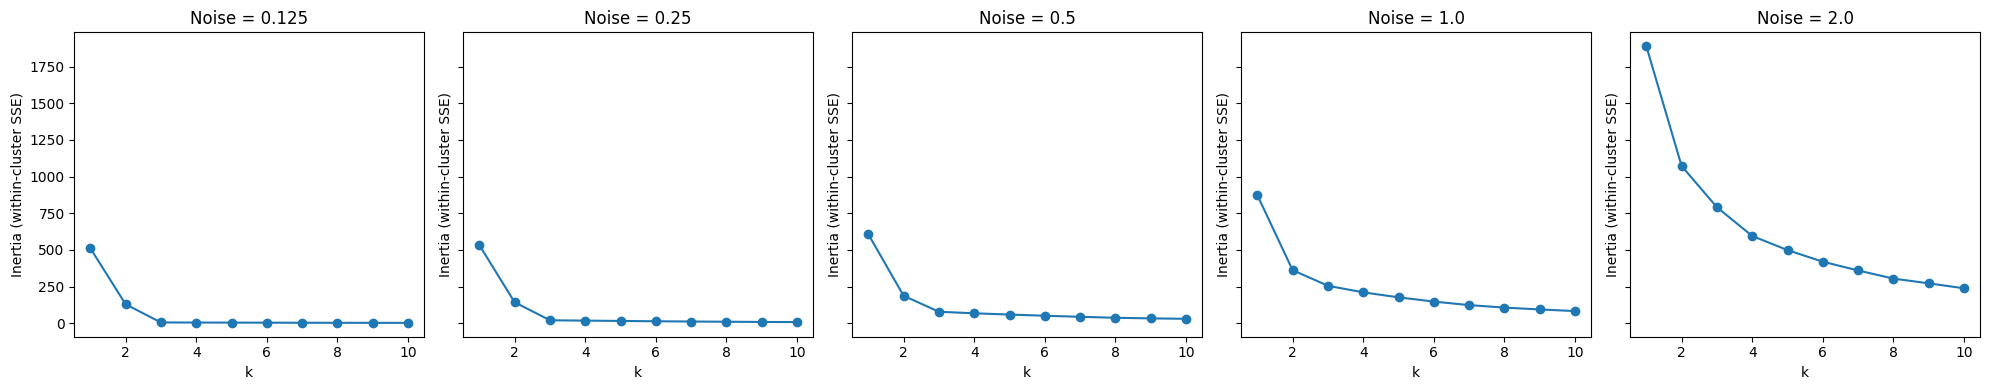

In [8]:
#Question 3
from sklearn.cluster import KMeans

def scree_plot(df, max_k=10, ax=None, title=""):
    X = df[["x1", "x2"]].values
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=100).fit(X)
        inertias.append(kmeans.inertia_)
    ax.plot(range(1, max_k+1), inertias, marker="o")
    ax.set_title(title)
    ax.set_xlabel("k")
    ax.set_ylabel("Inertia (within-cluster SSE)")

fig, axes = plt.subplots(1, 5, figsize=(20,4), sharey=True)
for ax, (title, df) in zip(axes, datasets.items()):
    scree_plot(df, ax=ax, title=title)

plt.tight_layout()
plt.show()

#Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  𝑘 .

'''At low noise, the scree plot shows a clear elbow at k=3, since the clusters are well separated.

As noise increases, the elbow becomes less sharp; the drop in inertia from k=2 → k=3 is smaller.

At high noise (2.0), the scree plot looks more gradual, with no obvious elbow — it becomes harder to pick the “true” k.'''

In [ ]:
#Questtion 4
'''Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow method: When we increase k, inertia (within-cluster SSE) always decreases (clusters fit better). But the rate of improvement decreases as k grows.

The “elbow” is the point where adding more clusters gives diminishing returns.

In this simulation:

At low noise, the elbow at k=3 is obvious because three clusters are natural.

At high noise, the data looks more like a blob; there’s no sharp elbow since the clusters overlap. It’s hard to justify exactly three clusters.

                                                                                    '''

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [12]:
#Q1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

path = "2022 election cycle fundraising.csv"   # adjust if needed
df = pd.read_csv(path)
money_cols = ["Raised", "Spent", "Cash on Hand", "Debts"]

# 3) one shot, vectorized cleaning:
#    - remove $ and commas
#    - turn (123) into -123
#    - treat blanks / dashes as missing
#    - convert to floats
df[money_cols] = (
    df[money_cols]
      .astype(str)
      .replace(r'[\$,]', '', regex=True)          # drop $ and ,
      .replace(r'^\((.*)\)$', r'-\1', regex=True) # (123) -> -123
      .replace(r'^\s*$|^[-–—]$', np.nan, regex=True)  # empty or single dash -> NaN
      .apply(pd.to_numeric, errors='coerce')
).astype("float64")#to float

# 4) quick check
print(df[money_cols].head())
print(df[money_cols].dtypes)  # should show float64

       Raised       Spent  Cash on Hand  Debts
0   7719396.0   7449678.0      851851.0    0.0
1   2192741.0   1243502.0     2472888.0    0.0
2  20993041.0  13957854.0    20942888.0    0.0
3   1211111.0   1173466.0      623472.0    0.0
4   1617611.0   1664674.0     1098579.0    0.0
Raised          float64
Spent           float64
Cash on Hand    float64
Debts           float64
dtype: object


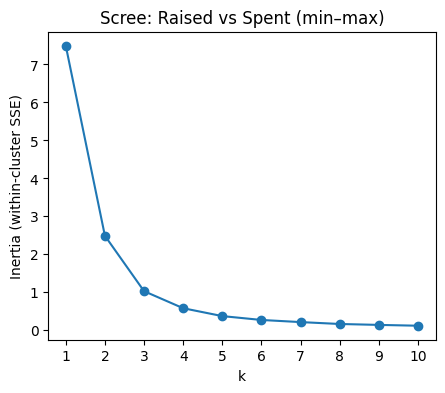

Suggested k from elbow heuristic: 2


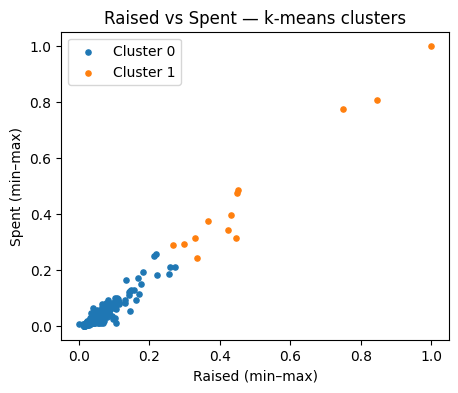

Cluster sizes (smallest first):
 cluster
1     13
0    524
Name: count, dtype: int64 


=== Candidates in smallest cluster 1 (n=13) ===
                Member     Raised      Spent
       Raphael Warnock 86581469.0 75959810.0
            Mark Kelly 73140886.0 61357281.0
           Val Demings 64682883.0 58806664.0
              Tim Ryan 38334636.0 36909832.0
Catherine Cortez Masto 37993811.0 35928936.0
             Tim Scott 37743256.0 23876921.0
           Marco Rubio 36709285.0 30153111.0
         Chuck Schumer 35899966.0 25944350.0
         Maggie Hassan 30914830.0 28380992.0
          John Kennedy 28119082.0 18276565.0
           Ron Johnson 27680901.0 23731653.0
        Kevin McCarthy 24791538.0 22086344.0
          Nancy Pelosi 22216583.0 21814643.0

=== Candidates in smallest cluster 0 (n=524) ===
                  Member     Raised      Spent
               Rand Paul 22490627.0 15865010.0
            Katie Porter 21441693.0 15946876.0
             Adam Schiff 20993041.0 1395785

In [14]:
#Q2: Max-min normalize Raised and Spent. Use a scree plot to determine the optimal number of clusters for the  𝑘  means clustering algorithm.
#Make a scatter plot of Raised against Spent and hue the dots by their cluster membership. What do you see?
#Which politicians comprise the smallest two clusters?
#If necessary, look up some of these races to see how close they were.
#Keep only what we need and drop rows with missing values
use1 = df[["Member", "Raised", "Spent"]].dropna().copy()

#Min–max normalize Raised and Spent
scaler = MinMaxScaler()
X = scaler.fit_transform(use[["Raised", "Spent"]].values)  # shape: (n_samples, 2)

#scree plot (elbow) to choose k
ks = range(1, 11)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(ks), inertias, marker="o")
plt.xticks(list(ks))
plt.xlabel("k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Scree: Raised vs Spent (min–max)")
plt.show()

#simple elbow heuristic: largest relative drop
rel_drops = np.diff(inertias) * -1 / np.array(inertias[:-1])
k_opt = max(2, 1 + rel_drops.argmax())  # keep at least k=2
print(f"Suggested k from elbow heuristic: {k_opt}")

#fit k-means with chosen k and scatter plot
km = KMeans(n_clusters=k_opt, n_init=50, random_state=42)
labels = km.fit_predict(X)
use["cluster"] = labels

plt.figure(figsize=(5,4))
for cl in sorted(use["cluster"].unique()):
    m = use["cluster"] == cl
    plt.scatter(X[m, 0], X[m, 1], s=14, label=f"Cluster {cl}")
plt.xlabel("Raised (min–max)")
plt.ylabel("Spent (min–max)")
plt.title("Raised vs Spent — k-means clusters")
plt.legend()
plt.show()

#find who is in samllest two clusters
sizes = use["cluster"].value_counts(ascending=True)
print("Cluster sizes (smallest first):\n", sizes, "\n")

smallest_two = sizes.index[:2] if len(sizes) >= 2 else sizes.index
for cl in smallest_two:
    sub = use[use["cluster"] == cl].copy()
    print(f"\n=== Candidates in smallest cluster {cl} (n={len(sub)}) ===")
    print(sub[["Member", "Raised", "Spent"]]
          .sort_values(["Raised","Spent"], ascending=[False, False])
          .head(25)
          .to_string(index=False))
#What do you see in scatter plot? the clusters are as expected with low money raised correlating with low spending. there are a couple outliers that still make sense where lots of money raised is correlated with higher spending.

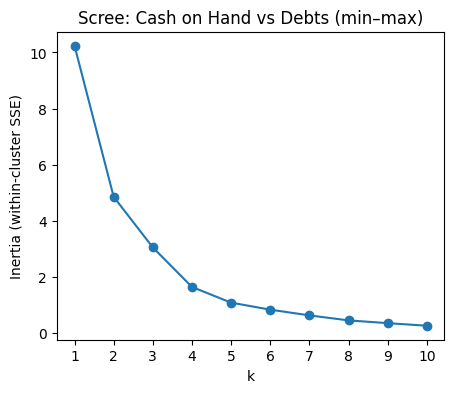

Suggested k from elbow heuristic: 2


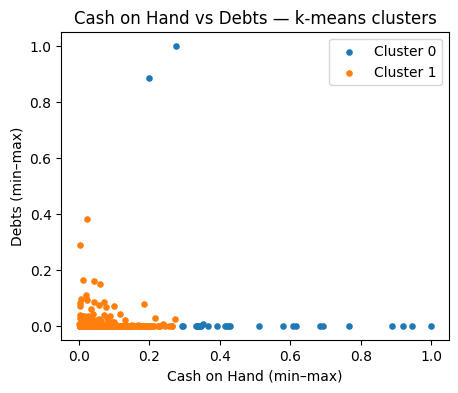

Cluster sizes (smallest first):
 cluster
0     28
1    509
Name: count, dtype: int64 


=== Members in smallest cluster 0 (n=28) ===
             Member  Cash on Hand   Debts
    Raphael Warnock    22762985.0     0.0
          Tim Scott    21539824.0     0.0
        Adam Schiff    20942888.0     0.0
      Chuck Schumer    20231213.0     0.0
         John Thune    17419927.0     0.0
       Katie Porter    15762568.0     0.0
       John Kennedy    15530074.0     0.0
    Josh Gottheimer    14024163.0     0.0
     Lindsey Graham    13815515.0     0.0
         Mark Kelly    13186127.0     0.0
Raja Krishnamoorthi    11633394.0     0.0
     Bernie Sanders     9751125.0     0.0
        Marco Rubio     9631856.0     0.0
     Richard Shelby     9558166.0     0.0
        Joe Manchin     9414431.0     0.0
         Jim Jordan     8855217.0     0.0
          Rand Paul     8308644.0     0.0
         Tom Cotton     7980477.0 77959.0
     Kyrsten Sinema     7876875.0     0.0
    Mitch McConnell     777

In [23]:
#Q3
#keep only what we need
use = df[["Member", "Cash on Hand", "Debts"]].dropna().copy()

#min–max scale (Cash on Hand, Debts)
scaler = MinMaxScaler()
X = scaler.fit_transform(use[["Cash on Hand", "Debts"]].values)

#scree plot (elbow) to choose k
ks = range(1, 11)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(ks), inertias, marker="o")
plt.xticks(list(ks))
plt.xlabel("k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Scree: Cash on Hand vs Debts (min–max)")
plt.show()

#simple elbow heuristic: biggest relative drop
rel_drops = np.diff(inertias) * -1 / np.array(inertias[:-1])
k_opt = max(2, 1 + rel_drops.argmax())   # keep at least k=2
print(f"Suggested k from elbow heuristic: {k_opt}")

#fit k-means and scatter plot
km = KMeans(n_clusters=k_opt, n_init=50, random_state=42)
labels = km.fit_predict(X)
use["cluster"] = labels

plt.figure(figsize=(5,4))
for cl in sorted(use["cluster"].unique()):
    m = use["cluster"] == cl
    plt.scatter(X[m, 0], X[m, 1], s=14, label=f"Cluster {cl}")
plt.xlabel("Cash on Hand (min–max)")
plt.ylabel("Debts (min–max)")
plt.title("Cash on Hand vs Debts — k-means clusters")
plt.legend()
plt.show()

#find who's in smallest two clusters
sizes = use["cluster"].value_counts(ascending=True)
print("Cluster sizes (smallest first):\n", sizes, "\n")

smallest_two = sizes.index[:2] if len(sizes) >= 2 else sizes.index
for cl in smallest_two:
    sub = use[use["cluster"] == cl].copy()
    print(f"\n=== Members in smallest cluster {cl} (n={len(sub)}) ===")
    print(sub[["Member", "Cash on Hand", "Debts"]]
          .sort_values(["Cash on Hand", "Debts"], ascending=[False, False])
          .head(25)
          .to_string(index=False))
#compare with raised&spent graph. both raised v. spent and cash on hand vs debt graphs suggest k = 2. However, the amount of members in the samllest clusters are differnet. Aslo, clusters
#based on Cash vs. Debt appear different visually from raised v spent cluster. Clustering using different metrics can reveal different groups of politicians.

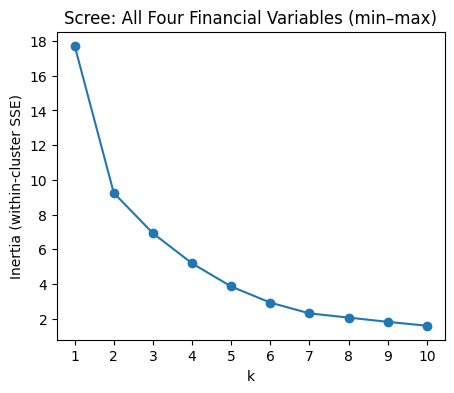

Suggested k from elbow heuristic (four variables): 2


In [17]:
#Q4
#filter and drop missing values
df_four_vars = df[["Member", "Raised", "Spent", "Cash on Hand", "Debts"]].dropna().copy()

#min–max normalize the four financial variables
scaler_four_vars = MinMaxScaler()
X_four_vars = scaler_four_vars.fit_transform(df_four_vars[["Raised", "Spent", "Cash on Hand", "Debts"]].values)

#scree plot (elbow) to choose k
ks_four_vars = range(1, 11)
inertias_four_vars = []
for k in ks_four_vars:
    km_four_vars = KMeans(n_clusters=k, n_init=20, random_state=42)
    km_four_vars.fit(X_four_vars)
    inertias_four_vars.append(km_four_vars.inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(ks_four_vars), inertias_four_vars, marker="o")
plt.xticks(list(ks_four_vars))
plt.xlabel("k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Scree: All Four Financial Variables (min–max)")
plt.show()

#Simple elbow heuristic: largest relative drop
rel_drops_four_vars = np.diff(inertias_four_vars) * -1 / np.array(inertias_four_vars[:-1])
k_opt_four_vars = max(2, 1 + rel_drops_four_vars.argmax()) # keep at least k=2
#k=2


#how do results compare to previous 2 parts. all three of them have a k = 2 (non distinct elbow)

In [24]:
#Q5
# Based on the previous analysis results:
'''Overall, k-means was able to find useful patterns in the 2022 fundraising data.
For all three comparisons, the elbow was at k=2, which split candidates into a well-funded group
(high raised/spent or high cash on hand with low debt) and a larger set with more modest finances.
The group of names that were put into the small cluster depends on the variables: raised and spent show activity volume,
cash, and debt shows financial position at a point in time. All four variables allowsfor a more holistic view.
The method is a good first attempt, but it assumes roughly spherical clusters
and the finance data are skewed, so elbows are not always sharp and higher-dimensional results need extra context.
i’d use k-means to get quick, sensible groups, then layer in race context like incumbency and competitiveness or other methods to dig deeper.'''



'Overall, k-means was able to find useful patterns in the 2022 fundraising data.\nFor all three comparisons, the elbow was at k=2, which split candidates into a well-funded group \n(high raised/spent or high cash on hand with low debt) and a larger set with more modest finances.\nThe group of names that were put into the small cluster depends on the variables: raised and spent show activity volume, \ncash, and debt shows financial position at a point in time. All four variables allowsfor a more holistic view. \nThe method is a good first attempt, but it assumes roughly spherical clusters \nand the finance data are skewed, so elbows are not always sharp and higher-dimensional results need extra context.\ni’d use k-means to get quick, sensible groups, then layer in race context like incumbency and competitiveness or other methods to dig deeper.'

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?